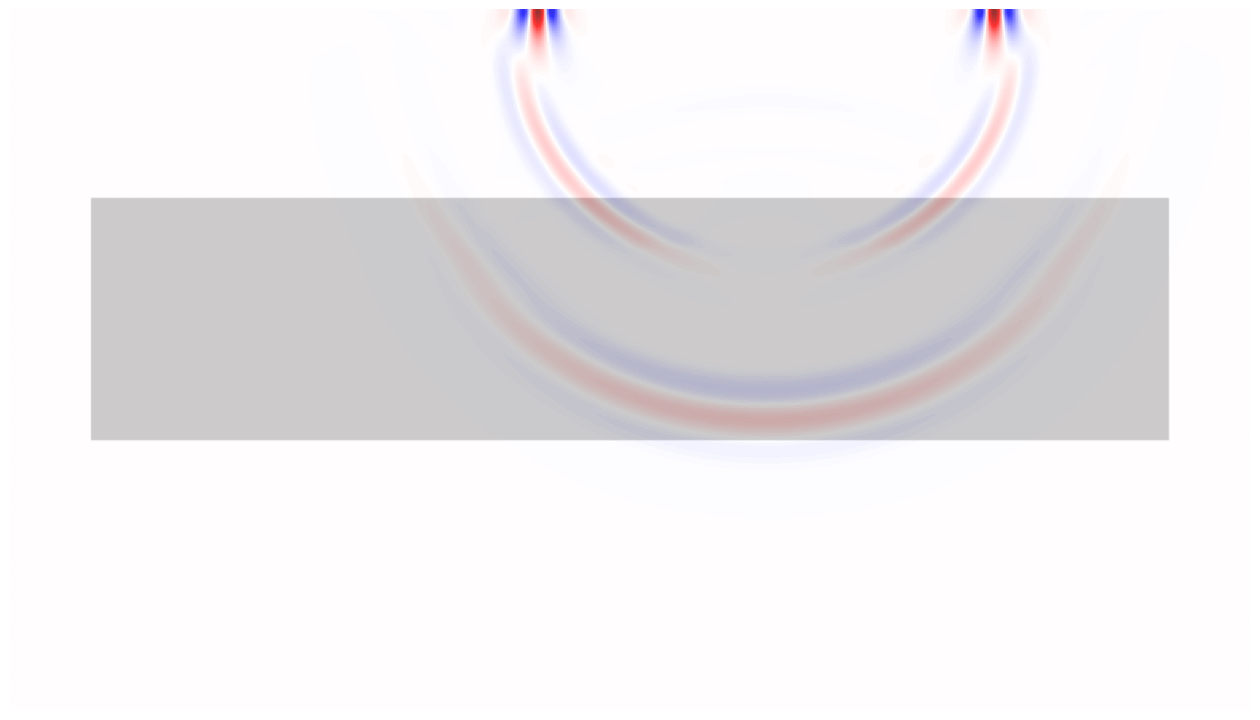

In [58]:
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import deepwave
from deepwave import elastic

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ny = 300
nx = 500
dx = 4.0

n_shots = 16

n_sources_per_shot = 1
d_source = 30
first_source = 40
source_depth = 2

n_receivers_per_shot = 9
d_receiver = 5
first_receiver = 0
receiver_depth = 2

freq = 15
nt = 120
dt = 0.004
peak_time = 1.5 / freq

# source_locations
source_locations = torch.zeros(
    n_shots, n_sources_per_shot, 2, dtype=torch.long, device=device
)
source_locations[..., 0] = source_depth
source_locations[:, 0, 1] = torch.arange(n_shots) * d_source + first_source

# receiver_locations
receiver_locations = torch.zeros(
    n_shots, n_receivers_per_shot, 2, dtype=torch.long, device=device
)
receiver_locations[..., 0] = receiver_depth
receiver_locations[:, :, 1] = (
    torch.arange(n_receivers_per_shot) * d_receiver + first_receiver
).repeat(n_shots, 1)

# source_amplitudes
source_amplitudes = (
    (deepwave.wavelets.ricker(freq, nt, dt, peak_time))
    .repeat(n_shots, n_sources_per_shot, 1)
    .to(device)
)

x_downsample = 50
y_downsample = 30
nx_coarse = nx // x_downsample
ny_coarse = ny // y_downsample

vp_center = 1500
vp_scale = 200
vs_center = 1000
vs_scale = 200
rho_center = 2200
rho_scale = 200

profile_background = torch.zeros(ny_coarse, nx_coarse).to(device)

# Nominal has a layer of higher vp, vs, and rho in the middle
profile_nominal = profile_background.clone()
profile_nominal[3:6, 1:9] = 1.0


vp = profile_nominal * vp_scale + vp_center
vs = profile_nominal * vs_scale + vs_center
rho = profile_nominal * rho_scale + rho_center

# Upsample the model to the simulation grid
vp = vp.repeat_interleave(y_downsample, dim=0).repeat_interleave(
    x_downsample, dim=1
)
vs = vs.repeat_interleave(y_downsample, dim=0).repeat_interleave(
    x_downsample, dim=1
)
rho = rho.repeat_interleave(y_downsample, dim=0).repeat_interleave(
    x_downsample, dim=1
)

out = elastic(
        *deepwave.common.vpvsrho_to_lambmubuoyancy(vp, vs, rho),
        dx,
        dt,
        source_amplitudes_y=source_amplitudes,
        source_locations_y=source_locations,
        receiver_locations_y=receiver_locations,
        # pml_freq=freq,
        pml_width=[0, 20, 20, 20],
    )

fig, ax = plt.subplots(1, figsize=(16, 32), sharey=True, sharex=True)
ax.imshow(out[0][8, :-20, 20:-20].cpu(), cmap='seismic', norm=colors.CenteredNorm())
ax.set_xticks([])
ax.set_yticks([])
plt.box(False)
# overlay rho
ax.imshow(rho[20:-20, 20:-20].cpu(), cmap='Greys', alpha=0.2)

In [53]:
receiver_locations

tensor([[[ 2,  0],
         [ 2,  5],
         [ 2, 10],
         [ 2, 15],
         [ 2, 20],
         [ 2, 25],
         [ 2, 30],
         [ 2, 35],
         [ 2, 40]],

        [[ 2,  0],
         [ 2,  5],
         [ 2, 10],
         [ 2, 15],
         [ 2, 20],
         [ 2, 25],
         [ 2, 30],
         [ 2, 35],
         [ 2, 40]],

        [[ 2,  0],
         [ 2,  5],
         [ 2, 10],
         [ 2, 15],
         [ 2, 20],
         [ 2, 25],
         [ 2, 30],
         [ 2, 35],
         [ 2, 40]],

        [[ 2,  0],
         [ 2,  5],
         [ 2, 10],
         [ 2, 15],
         [ 2, 20],
         [ 2, 25],
         [ 2, 30],
         [ 2, 35],
         [ 2, 40]],

        [[ 2,  0],
         [ 2,  5],
         [ 2, 10],
         [ 2, 15],
         [ 2, 20],
         [ 2, 25],
         [ 2, 30],
         [ 2, 35],
         [ 2, 40]],

        [[ 2,  0],
         [ 2,  5],
         [ 2, 10],
         [ 2, 15],
         [ 2, 20],
         [ 2, 25],
         [ 2, 30],
  